#**COVID-19 Data Analysis**

To start, we will begin by importing necessary Python packages for the analysis we will be doing, and we will pull publicly available COVID data from the COVID Tracking Project. 

In [2]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

statejson = 'https://api.covidtracking.com/v1/states/daily.json'

df = pd.read_json(statejson)

####Correlation Heatmap

Most of the analysis and visualizations we will complete will focus on state by state COVID death statistics, but the data COVID-19 Tracking Project provides is extensive and includes many pieces of information we will not use. However, it is interesting to explore the pieces of information and the correlation between them. Below is a heatmap to demonstrate the correlation between various data points the project collects.

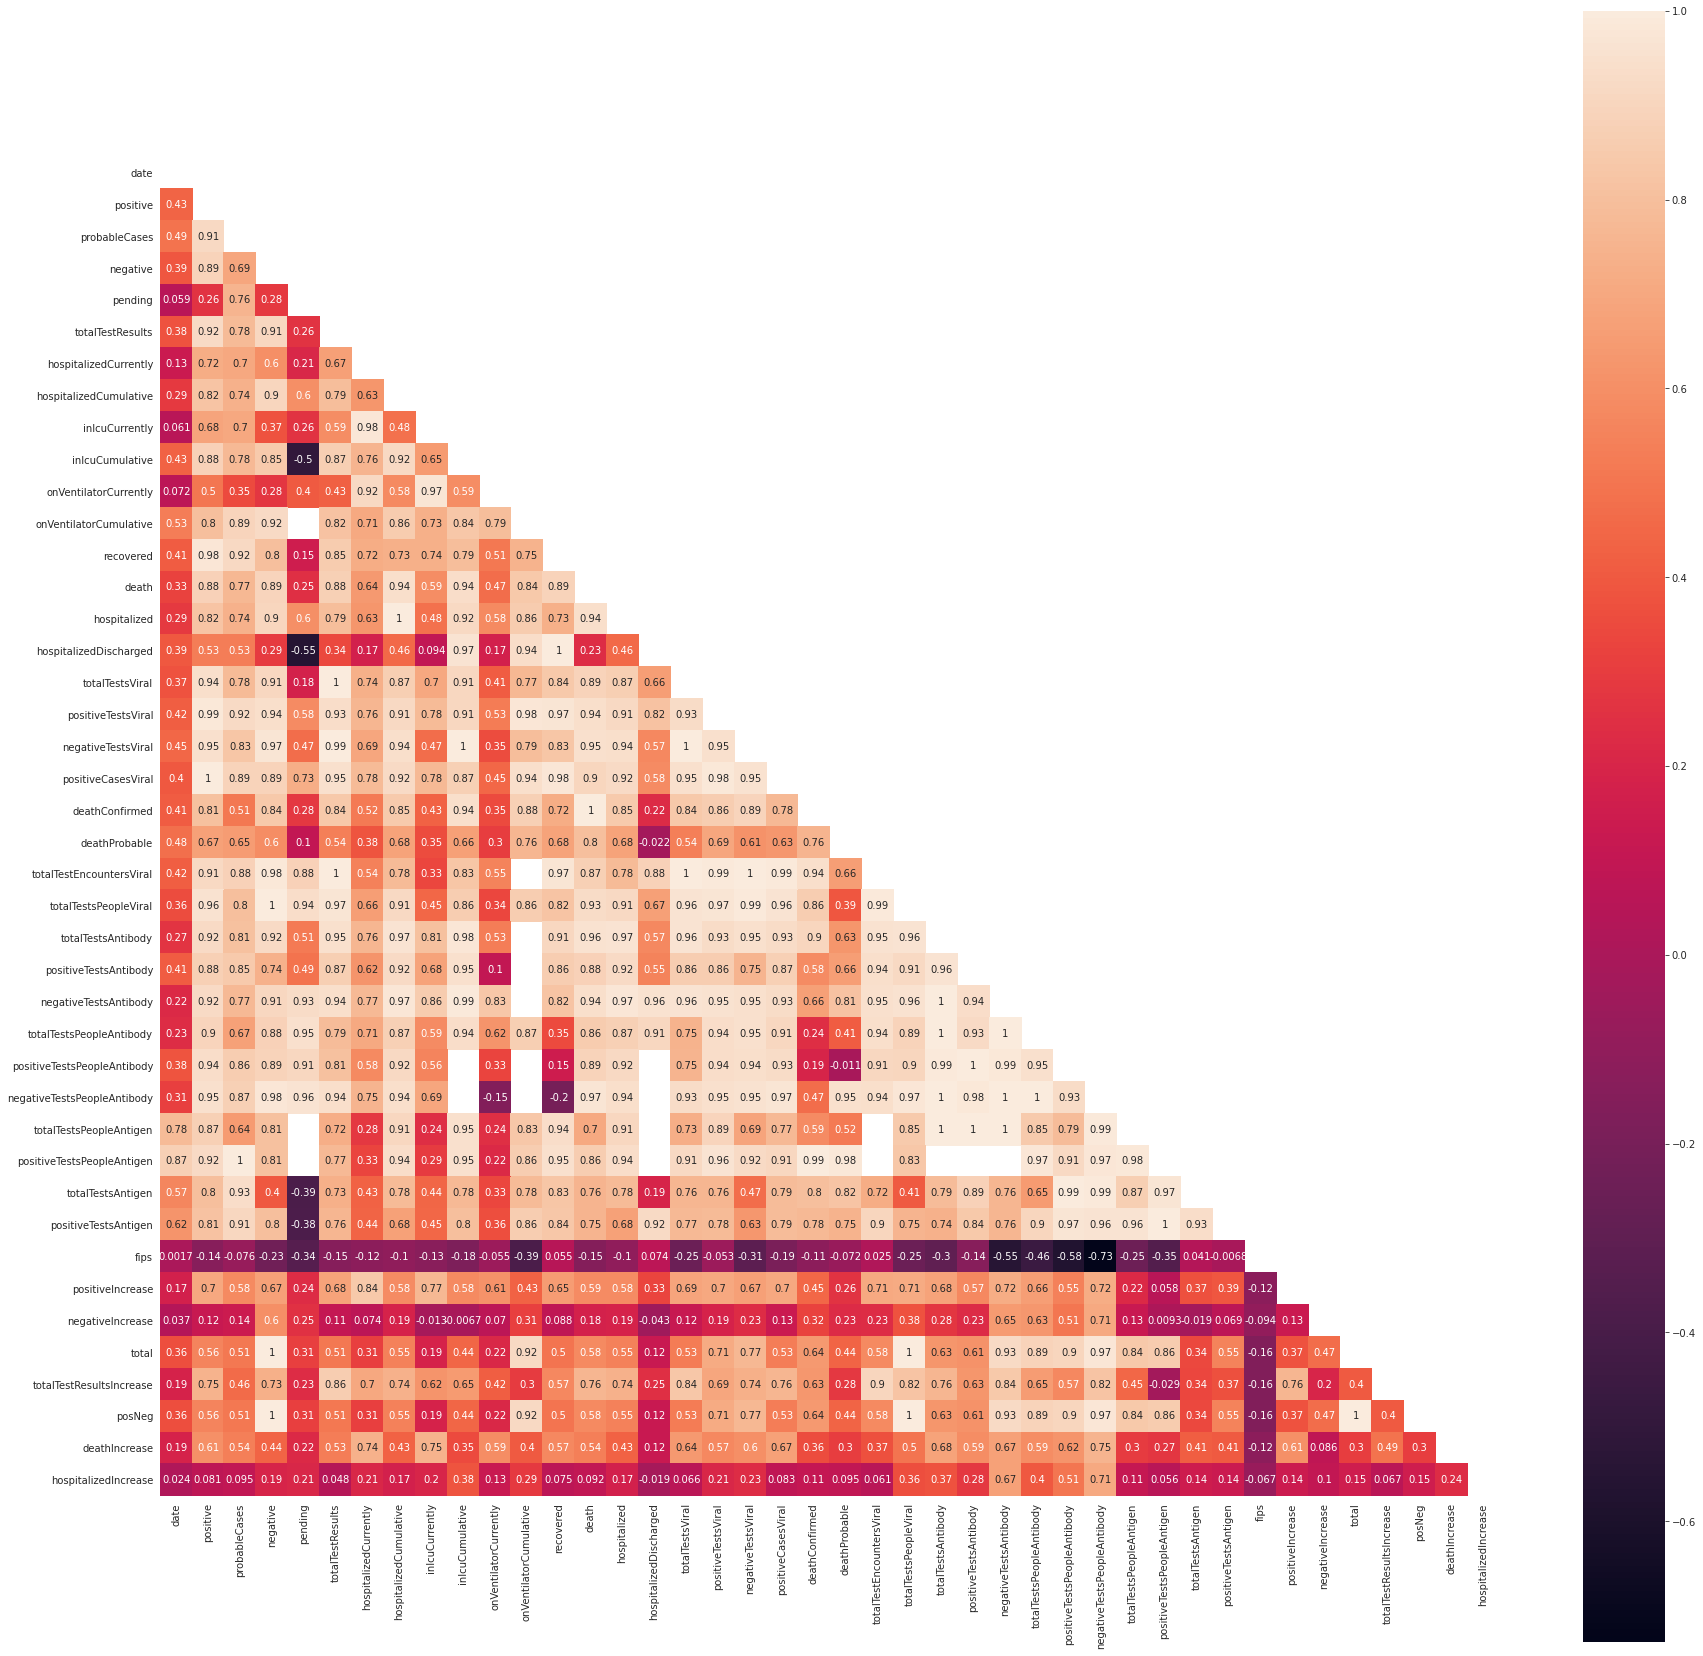

In [132]:
#Create a correlation table
corr = df.corr()
corr.dropna(how='all', inplace=True)
corr.dropna(axis=1,how='all', inplace=True)

#Create a mask for the upper right portion of the table to hide duplication
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

#Create the heatmap
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30, 30))
    ax = sns.heatmap(corr, mask=mask, annot=True, square=True)

##**Gross Deaths by State Analysis**

###Overall Summary and Numbers

First, we will start with an analysis of total overall deaths from COVID by state, without regard to state population. Below is a table of overall COVD deaths by state, ranked from most to least.

In [3]:
#Create a DataFrame of total deaths by state.
topstats = df[['state', 'deathIncrease']]
df_grossdeathsbystate = topstats.groupby(by='state').sum().sort_values(by='deathIncrease', ascending=False).reset_index()

#Rename some columns to be more accurate. Reindex from 1 and rename for ease or reading.
df_grossdeathsbystate.set_index(keys=(df_grossdeathsbystate.index + 1), inplace=True)
df_grossdeathsbystate.index.name = 'Rank'
df_grossdeathsbystate.rename(columns={'deathIncrease' : 'Total Deaths'}, inplace=True)

#Show the table
df_grossdeathsbystate

,state,Total Deaths
Rank,,
1,CA,54124
2,TX,44451
3,NY,39029
4,FL,32266
5,PA,24349
6,NJ,23574
7,IL,23014
8,GA,17906
9,OH,17656


Next we will display the above table as a bar chart. The red line represents the average number of deaths per state on a gross basis.

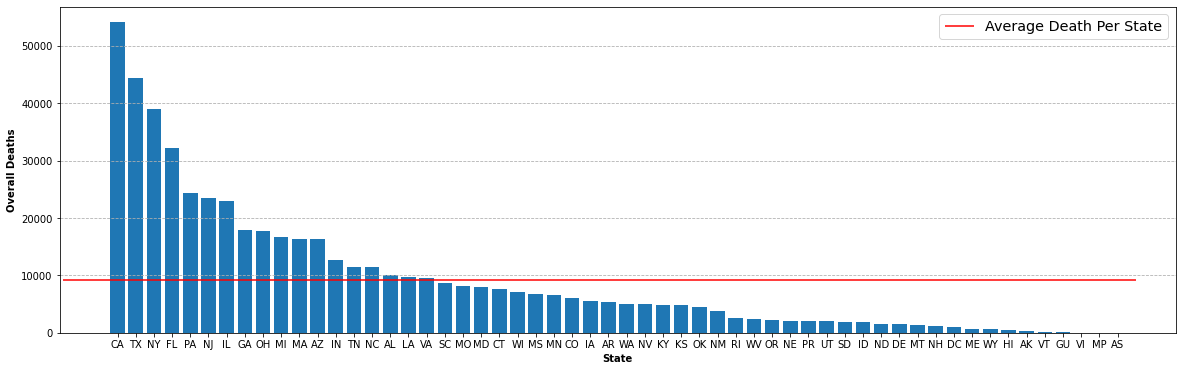

In [4]:
#Create X and Y Values for a Bar Chart of Total Overall Deaths by State
values = df_grossdeathsbystate['Total Deaths'].values
labels = df_grossdeathsbystate['state'].values

#Confgure the style and labels of the chart
plt.figure(figsize=(20,6))
plt.xlabel('State', fontweight='bold')
plt.ylabel('Overall Deaths', fontweight='bold')
plt.grid(b=True, axis='y', linestyle='--')
plt.hlines(y=df_grossdeathsbystate['Total Deaths'].mean(), xmin=-3, xmax=len(labels), colors='red', label='Average Death Per State')
plt.legend(fontsize='x-large')

#Create and show the chart
grossbar = plt.bar(labels, values)
plt.show()

###Deaths over Time

Next we will visualize deaths over time, focusing on the 5 worst states in total numbers. 

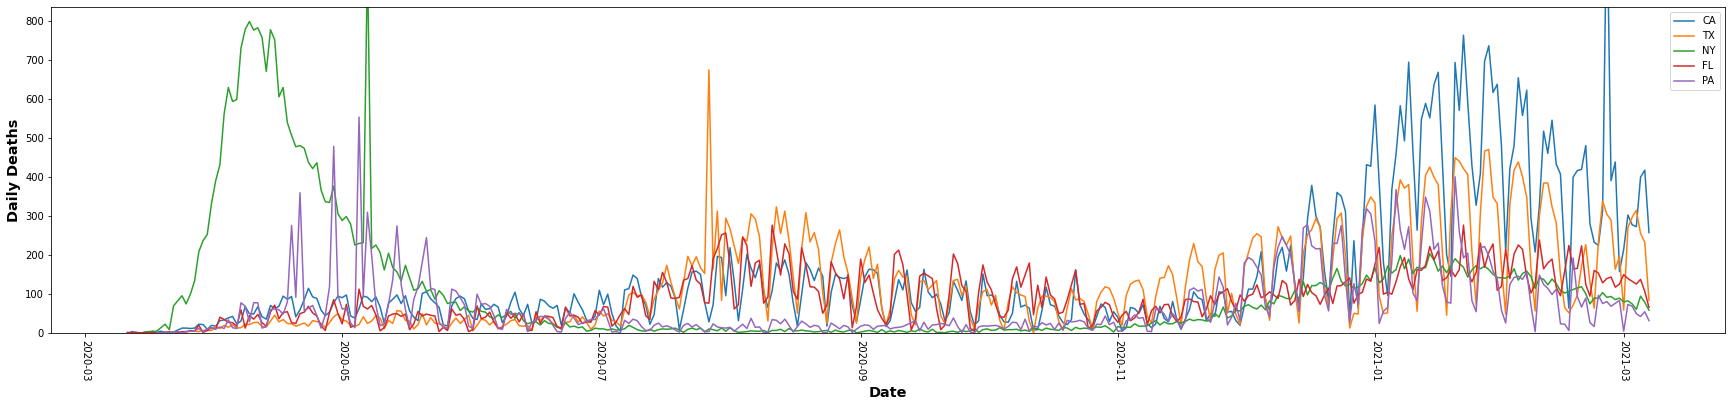

In [5]:
#Plot the deaths per day of the x worst states for gross deaths. Default is top 5.
xworst = 5
worststatearray = df_grossdeathsbystate['state'].values[0:xworst]

def deathincreasechart(xworst=xworst, worststatearray=worststatearray):
    #create dataframe only with those states. Cut out negative death days for cleaning purposes.
    dftouse = df[['state', 'date', 'deathIncrease']].loc[(df['state'].isin(worststatearray)) & (df['deathIncrease'] > 0)]
    dftouse.sort_values(by='date', inplace=True)

    #Plot Multiple states in one graph- daily death increases
    fig, ax = plt.subplots(figsize=(30,6))

    #Set Y as maximum death amount
    ax.set_ylim(ymax=dftouse['deathIncrease'].quantile(0.999))

    #Create a plot for each state
    for state in worststatearray:
        deaths = dftouse.loc[(dftouse['state'] == state)]['deathIncrease']
        dates = dftouse.loc[(dftouse['state'] == state)]['date'].values
        dates = pd.to_datetime(dates, format='%Y%m%d')
        ax.plot(dates, deaths, label=state)

    #Configure the labels and ticks of the axes. Set the legend to display.
    plt.xticks(rotation=270)
    plt.xlabel('Date', fontweight='bold', fontsize='x-large')
    plt.ylabel('Daily Deaths', fontweight='bold', fontsize='x-large')
    plt.legend()

    #Show the chart
    plt.show()

deathincreasechart()

Next we will visualize the cumulative number of deaths over time in the same states.

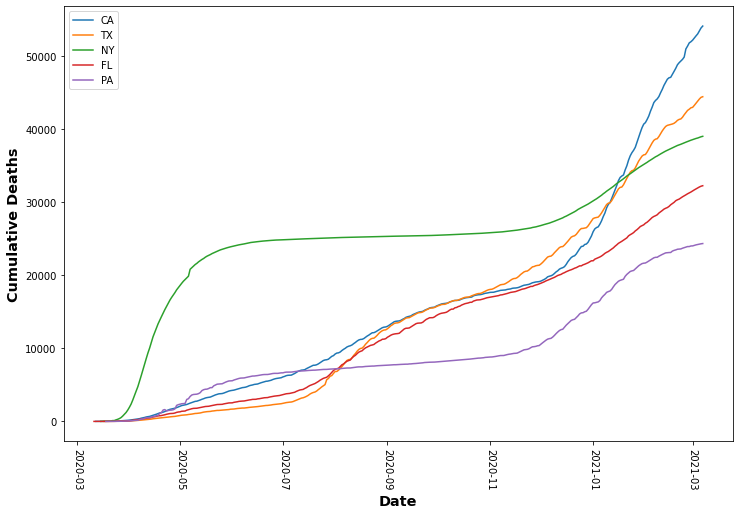

In [6]:
#Plot the deaths per day of the x worst states for gross cumulative deaths. Default is top 5.
xworst = 5
worststatearray = df_grossdeathsbystate['state'].values[0:xworst]

def cumulativedeathchart(xworst=xworst, worststatearray=worststatearray):
    #create dataframe only with those states. Cut out negative death days for cleaning purposes.
    worststate_df = df[['state', 'date', 'death']].loc[(df['state'].isin(worststatearray)) & (df['death'] > 0)]
    worststate_df.sort_values(by='date', inplace=True)

    #Plot Multiple states in one graph- daily death increases
    fig, ax = plt.subplots(figsize=(12,8))

    #State plots
    for state in worststatearray:
        deaths = worststate_df.loc[(worststate_df['state'] == state)]['death']
        dates = worststate_df.loc[(worststate_df['state'] == state)]['date'].values
        dates = pd.to_datetime(dates, format='%Y%m%d')
        ax.plot(dates, deaths, label=state)

    plt.xticks(rotation=270)
    plt.xlabel('Date', fontweight='bold', fontsize='x-large')
    plt.ylabel('Cumulative Deaths', fontweight='bold', fontsize='x-large')
    plt.legend()
    plt.show()

cumulativedeathchart()

##**Per Capita Death Analysis**

###Overall Summary and Numbers

Next we will analyze deaths per state on a per capita basis to judge the relative performance of states in light of their population. To start, we will create a table including state populations and overall deaths for raw data. Additionally, we will create analysis columns giving the per capita percentage of deaths for the state, the differential between each state's performance and the average, and how many standard deviations outside the mean that performance is. This table is displayed below ordered by performance vs. the mean, worst to best.

In [97]:
#Create DataFrame with overall death amounts per state
df_percap = df[['state','deathIncrease']].groupby(by='state', as_index=False).sum()
df_percap.rename(columns={'deathIncrease' : 'Total Deaths'}, inplace=True)

#Dictionary of state populations
populations = {'AL': 4908620, "AK": 734002, "AZ": 7378490, "AR": 3039000,"CA": 39937500,"CO": 5845530, "CT": 3563080, "DE": 982895, "DC": 720687, "FL": 21993000, "GA": 10736100, "HI": 1412690, "ID": 1826670, "IL": 12659700, "IN": 6475350, "IA": 3179850, "KS": 2910360, "KY": 4490690, "LA": 4645180, "ME": 1345790, "MD": 6083120, "MA": 6976600, "MI": 10045000, "MN": 5700670, "MS": 2989260, "MO": 6169270, "MT": 1086769, "NE": 1952570, "NV": 3139660, "NH": 1371250, "NJ": 8936570, "NM": 2096940, "NY": 19440500, "NC": 10611900, "ND": 761723, "OH": 11747700, "OK": 3954820, "OR": 4301090, "PA": 12820900, "RI": 1056160, "SC": 5210100, "SD": 903027, "TN": 6897580, "TX": 29472300, "UT": 3282120, "VT": 628061, "VA": 8626210, "WA": 7797100, "WV": 1778070, "WI": 5851750, "WY": 567025}

#Create Column for population of each state and map it, drop rows that do not relate to US states/D.C.
df_percap['population'] = df_percap['state'].map(populations)
df_percap.dropna(inplace=True)

#Create additional rows for per capita statistics for each state
df_percap.insert(3, column='Per Capita Death %', value=((df_percap['Total Deaths']/df_percap['population']) * 100))
df_percap.insert(4, column='Vs. Average', value=(df_percap['Per Capita Death %'] - df_percap['Per Capita Death %'].mean()))
df_percap.sort_values(by='Per Capita Death %', inplace=True, ascending=False)
df_percap.insert(5, column='Std. Dev. Outside Mean', value=((df_percap['Per Capita Death %'] - df_percap['Per Capita Death %'].mean()) / df_percap['Per Capita Death %'].std()))

#Reset index labels to align cleanly with state rank, worst to best
df_percap.reset_index(inplace=True)
df_percap.set_index(keys=(df_percap.index + 1), inplace=True)
df_percap.drop(labels='index', axis=1, inplace=True)

#Display table
df_percap

,state,Total Deaths,population,Per Capita Death %,Vs. Average,Std. Dev. Outside Mean
1,NJ,23574,8936570.0,0.263792,0.117669,2.069151
2,RI,2541,1056160.0,0.240589,0.094465,1.661122
3,MA,16417,6976600.0,0.235315,0.089192,1.568393
4,MS,6808,2989260.0,0.227749,0.081625,1.435340
5,AZ,16328,7378490.0,0.221292,0.075169,1.321801
6,CT,7704,3563080.0,0.216217,0.070094,1.232569
7,SD,1900,903027.0,0.210403,0.064280,1.130334
8,LA,9748,4645180.0,0.209852,0.063729,1.120636
9,AL,10148,4908620.0,0.206738,0.060615,1.065885
10,NY,39029,19440500.0,0.200761,0.054638,0.960782


###Deaths over Time

Next we will visualize deaths over time, focusing on the 5 worst performing states on a per capita basis. Deaths are still displayed on an absolute basis.

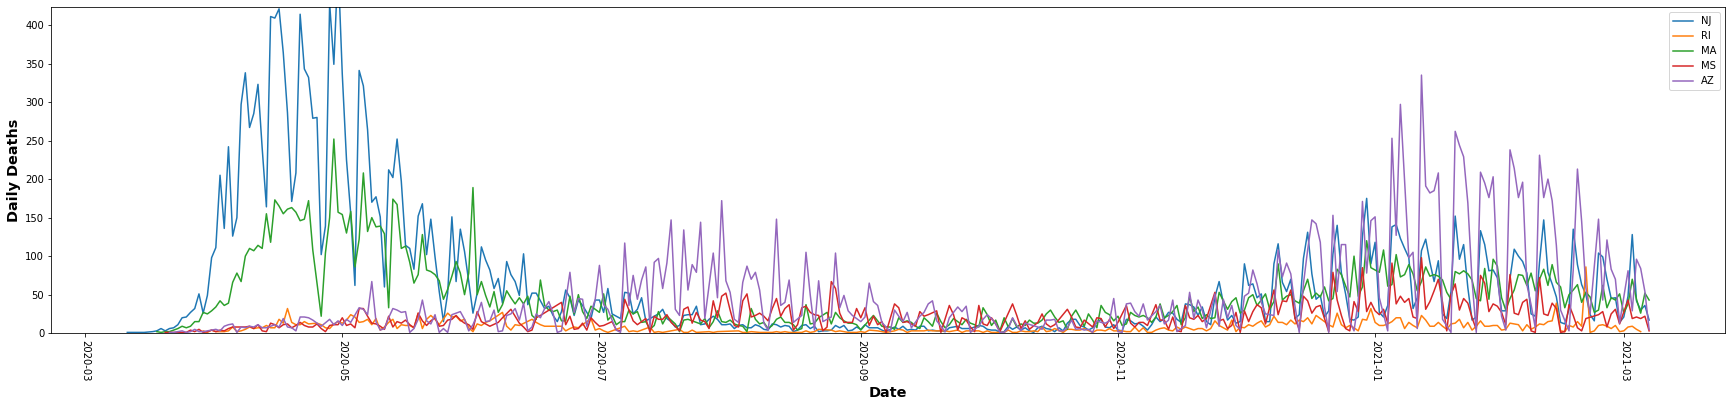

In [8]:
#Plot the deaths per day of the x worst states for per capita deaths. Default is top 5.
xworst = 5
worststatearray = df_percap['state'].values[0:xworst]

deathincreasechart(xworst=xworst, worststatearray=worststatearray)

Next we will visualize the cumulative number of deaths over time in the same states, which are again expressed on an absolute basis.

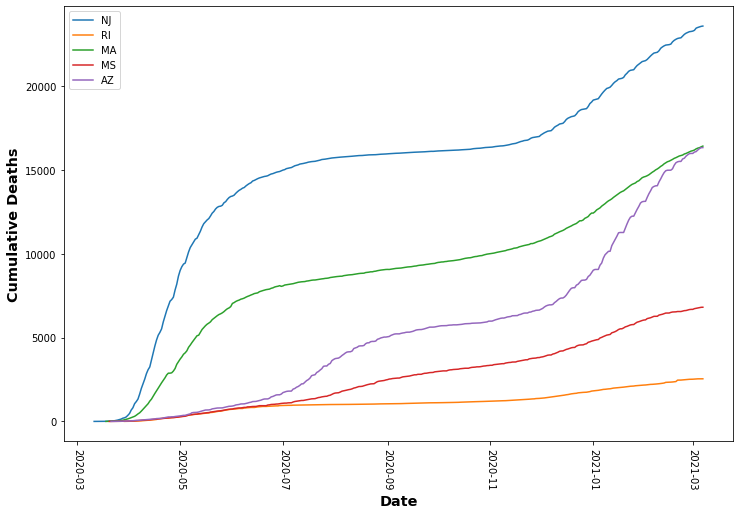

In [9]:
#Graph Cumulative deaths of worst states per capita. Default is top 5.
xworst = 5
worststatearray = df_percap['state'].values[0:xworst]

cumulativedeathchart(xworst=xworst, worststatearray=worststatearray)

###Overall graph of state performance

In closing, we will visualize the performance of all states relative to the mean in a scatter plot. The Y axis is performance on a relative basis as expressed as standard variations outside the mean, with a larger number/higher position on the graph indicating worse performance. The X axis is overall state population, while the size of each circle scales to the overall number of deaths in the state.

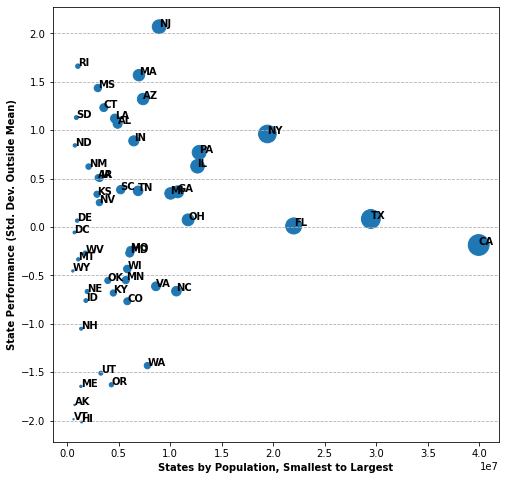

In [141]:
#Chart X and Y values for the graph
values = df_percap['Std. Dev. Outside Mean'].values
labels = df_percap['population'].values

#Create Settings for the axes labels, gridlines, and overall figure size.
plt.figure(figsize=(8, 8))
plt.xlabel('States by Population, Smallest to Largest', fontweight='bold')
plt.ylabel('State Performance (Std. Dev. Outside Mean)', fontweight='bold')
plt.grid(b=True, axis='y', linestyle='--')

#Add labels for plot points.
for x in range(1, len(df_percap) + 1):
    plt.text(df_percap['population'][x], df_percap['Std. Dev. Outside Mean'][x], df_percap['state'][x], fontweight='bold')

#Show plot
plt.scatter(labels, values, s=(df_percap['Total Deaths']/125))